시계열 데이터의 잡음 제거(Denoising) 방법

시계열 데이터는 종종 실제 신호(signal)에 불필요한 잡음(noise)이 포함되어 있습니다. 잡음 제거는 데이터의 주요 패턴을 유지하면서 노이즈를 억제하는 것을 목표로 합니다.

##  이동평균

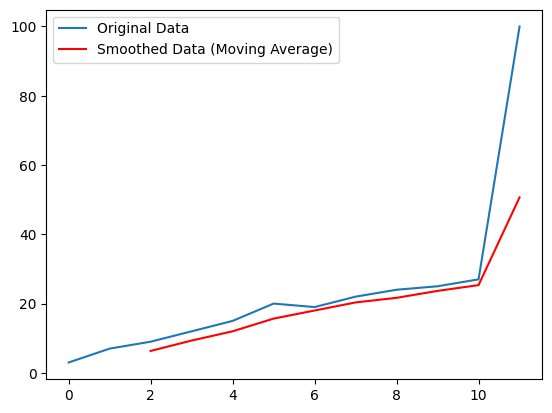

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터 생성
data = [3, 7, 9, 12, 15, 20, 19, 22, 24, 25, 27,100]
df = pd.Series(data)

# 이동 평균 적용
window_size = 3
smoothed = df.rolling(window=window_size).mean()

# 결과 시각화
plt.plot(df, label="Original Data")
plt.plot(smoothed, label="Smoothed Data (Moving Average)", color='red')
plt.legend()
plt.show()


### 가우시안 필터 (Gaussian Filter)

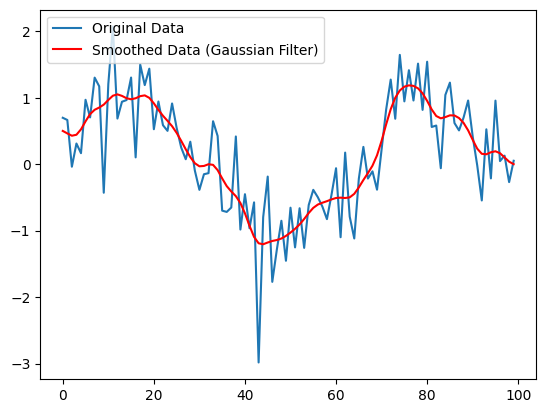

In [3]:
from scipy.ndimage import gaussian_filter1d
import numpy as np

# 예제 데이터 생성
data = np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.5, 100)

# 가우시안 필터 적용
smoothed = gaussian_filter1d(data, sigma=2)

# 결과 시각화
plt.plot(data, label="Original Data")
plt.plot(smoothed, label="Smoothed Data (Gaussian Filter)", color='red')
plt.legend()
plt.show()


### 웨이블렛 변환 (Wavelet Transform)

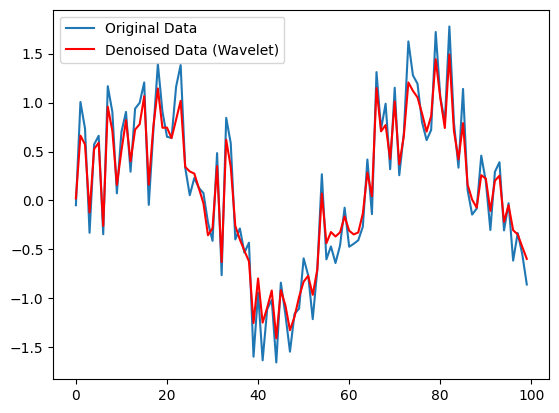

In [4]:
import pywt
import numpy as np

# 예제 데이터 생성
data = np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.5, 100)

# 웨이블렛 변환 및 역변환
wavelet = 'db4'
coeffs = pywt.wavedec(data, wavelet)
threshold = 0.2
denoised_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
denoised = pywt.waverec(denoised_coeffs, wavelet)

# 결과 시각화
plt.plot(data, label="Original Data")
plt.plot(denoised, label="Denoised Data (Wavelet)", color='red')
plt.legend()
plt.show()


### 사비츠키-골레이 필터 (Savitzky-Golay Filter)

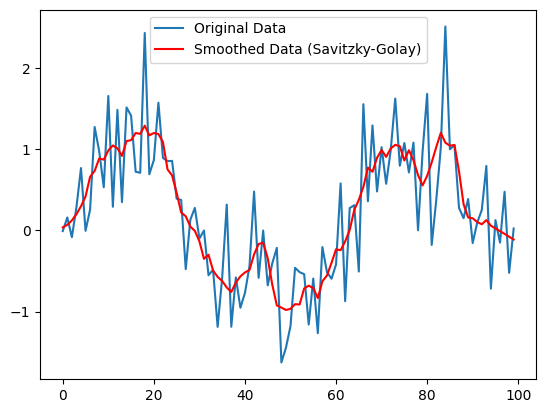

In [5]:
from scipy.signal import savgol_filter

# 예제 데이터 생성
data = np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.5, 100)

# 사비츠키-골레이 필터 적용
smoothed = savgol_filter(data, window_length=11, polyorder=2)

# 결과 시각화
plt.plot(data, label="Original Data")
plt.plot(smoothed, label="Smoothed Data (Savitzky-Golay)", color='red')
plt.legend()
plt.show()


### 저주파 필터 (Low-Pass Filter)

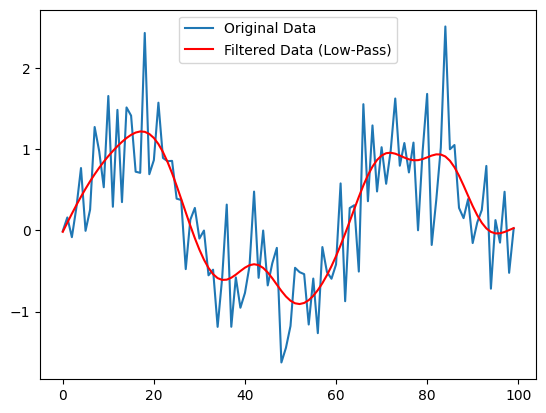

In [6]:
from scipy.signal import butter, filtfilt

# 저주파 필터 설계
def low_pass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# 예제 데이터 생성
fs = 30  # 샘플링 주파수
cutoff = 2  # 컷오프 주파수
filtered = low_pass_filter(data, cutoff, fs)

# 결과 시각화
plt.plot(data, label="Original Data")
plt.plot(filtered, label="Filtered Data (Low-Pass)", color='red')
plt.legend()
plt.show()
